In [1]:
import mysql.connector

In [2]:
connection = mysql.connector.connect(user='root')

In [3]:
def query(q=None):
    
    if q is None:
        return 
    
    global connection
    
    if connection.is_connected() is False:
        connection = mysql.connector.connect(user='root')
    
    with connection.cursor() as cursor:
        for _ in q.split(';'):
            if _ == "\n":
                continue
            try:
                cursor.execute(_, multi=False)
                records = cursor.fetchall()

                for r in records:
                    print(r)
                connection.commit()

            except mysql.connector.Error as err:
                print(f'Error: {err}')

# Отношения

### Основные принципы реляционных баз данных:
* Все данные на концептуальном уровне представляются в виде объектов, заданных в виде строк и столбцов, называемых отношением, более распространенное название - таблица;
* В пересечение строки и столбца таблицы можно занести только одно значение;
* Все операции выполняются над целыми отношениями и результатом этих операций являются отношение. 

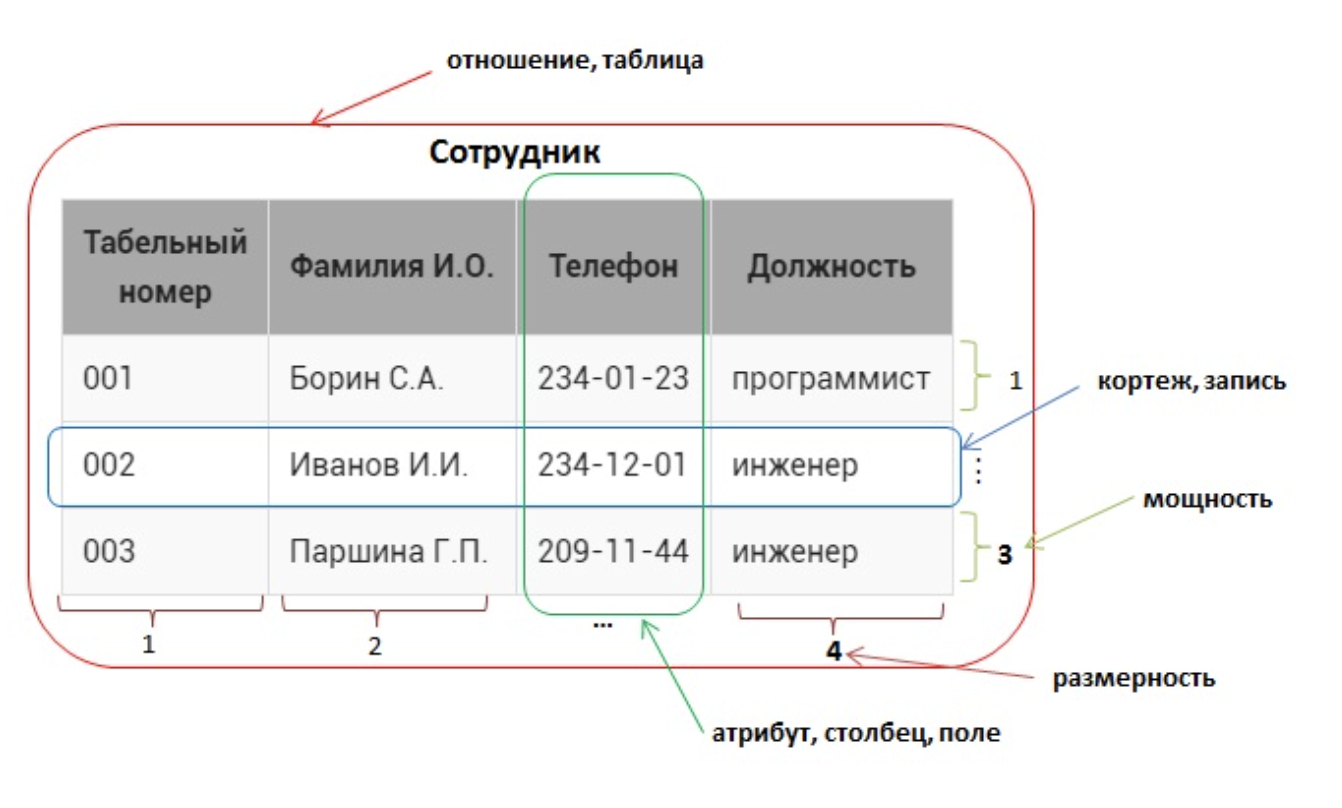

### Терминология реляционных баз данных:
* **отношение** - это структура данных цкликом, набор данных;
* **кортеж** - это каждая строка, содержащая данные;
* **мощность** - число кортежей в таблице(количество записей);
* **атрибут** - столбец в таблице;
* **размерность** - число атрибутов в таблице;
* **домен атрибута** - допустимые значения, которые можно занести в поле.

### Типы данных: 
* INT / INTEGER
* DECIMAL / NUMERIC
* DATE
* VARCHAR

Для описания ключевого поля(id) используется описание INT PRIMARY KEY AUTO_INCREMENT

In [4]:
query("USE sql_training")

In [5]:
q = """
DROP TABLE IF EXISTS book;
DROP TABLE IF EXISTS genre;
"""

query(q)

In [6]:
# создание таблицы

q = """
CREATE TABLE genre (
    genre_id INT PRIMARY KEY AUTO_INCREMENT,
    name_genre VARCHAR(30)
);
"""

query(q)

In [7]:
q = """
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT,
    title VARCHAR(50),
    author VARCHAR(30),
    price DECIMAL(8, 2),
    amount INT
);
SHOW TABLES;
"""

query(q)

('book',)
('genre',)


In [8]:
q = """
SHOW TABLES;
"""

query(q)

('book',)
('genre',)


In [9]:
# занесение данных в таблицу

q = """
INSERT INTO book(title, author, price, amount)
VALUES ('Мастер и Маргарита', 'Булгаков М.А.', '670.99', '3');
SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)


In [10]:
q = """
INSERT INTO book(title, author, price, amount)
VALUES ('Белая гвардия', 'Булгаков М.А.', 540.50, 5),
    ('Идиот', 'Достоевский Ф.М.', 460.00, 10),
    ('Братья Карамазовы', 'Достоевский Ф.М.', 799.01, 2);
SELECT * FROM book
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 2)


In [11]:
q = """
SELECT author, title, price from book;
"""

query(q)

('Булгаков М.А.', 'Мастер и Маргарита', Decimal('670.99'))
('Булгаков М.А.', 'Белая гвардия', Decimal('540.50'))
('Достоевский Ф.М.', 'Идиот', Decimal('460.00'))
('Достоевский Ф.М.', 'Братья Карамазовы', Decimal('799.01'))


In [12]:
# изменение названий столбцов

q = """
SELECT title as Название, amount FROM book;
"""

query(q)

('Мастер и Маргарита', 3)
('Белая гвардия', 5)
('Идиот', 10)
('Братья Карамазовы', 2)


In [13]:
q = """
SELECT title, author, price, amount, 
    price * amount AS total 
FROM book;
"""

query(q)

('Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3, Decimal('2012.97'))
('Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5, Decimal('2702.50'))
('Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10, Decimal('4600.00'))
('Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 2, Decimal('1598.02'))


### Математические функции:
* CEILING(x) - округление до целого в большую сторону;
* ROUND(x, k) - округление до k знаков;
* FLOOR(x) - округление до целого в меньшую сторону;
* POWER(x) - возведение в степень;
* SQRT(x) - квадратный корень;
* DEGREES(x) - перевод из радиан в градусы;
* Radian(x) - из градусов в радианы;
* ABS(x) - модуль числа;
* PI() - число пи.

In [14]:
q = """
SELECT title, author, amount,
    ROUND(price * 0.7, 2) as new_price
FROM book;
"""

query(q)

('Мастер и Маргарита', 'Булгаков М.А.', 3, Decimal('469.69'))
('Белая гвардия', 'Булгаков М.А.', 5, Decimal('378.35'))
('Идиот', 'Достоевский Ф.М.', 10, Decimal('322.00'))
('Братья Карамазовы', 'Достоевский Ф.М.', 2, Decimal('559.31'))


In [15]:
# логические выражения

q = """
SELECT title, amount, price,
    IF(amount<4, price*0.5, price*0.7) as SALE
FROM book;
"""

query(q)

('Мастер и Маргарита', 3, Decimal('670.99'), Decimal('335.495'))
('Белая гвардия', 5, Decimal('540.50'), Decimal('378.350'))
('Идиот', 10, Decimal('460.00'), Decimal('322.000'))
('Братья Карамазовы', 2, Decimal('799.01'), Decimal('399.505'))


In [16]:
q = """
SELECT author, title,
ROUND(
    IF(author='Булгаков М.А.', price*1.1,
        IF(author='Есенин С.А', price * 1.05, price)), 2 
) as new_price 
FROM BOOK;
"""

query(q)

('Булгаков М.А.', 'Мастер и Маргарита', Decimal('738.09'))
('Булгаков М.А.', 'Белая гвардия', Decimal('594.55'))
('Достоевский Ф.М.', 'Идиот', Decimal('460.00'))
('Достоевский Ф.М.', 'Братья Карамазовы', Decimal('799.01'))


### оператор WHERE

In [17]:
q = """
SELECT title, price
FROM book
WHERE price < 600;
"""

query(q)

('Белая гвардия', Decimal('540.50'))
('Идиот', Decimal('460.00'))


In [18]:
q = """
SELECT title, author, price
FROM book
WHERE price > 600 and author = 'Булгаков М.А.';
"""

query(q)

('Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'))


In [19]:
q = """
SELECT title, author, price, amount
FROM book
WHERE(
    (price < 500 or price > 600) and 
    (price*amount > 5000)
);
"""

query(q)

In [20]:
q = """
SELECT title, author 
FROM book 
WHERE(
    (price BETWEEN 540.5 and 800) and
    amount in (2, 3, 5, 7)
);
"""

query(q)

('Мастер и Маргарита', 'Булгаков М.А.')
('Белая гвардия', 'Булгаков М.А.')
('Братья Карамазовы', 'Достоевский Ф.М.')


In [21]:
q = """
SELECT author, title FROM book
WHERE amount BETWEEN 2 and 14
ORDER BY author DESC, title ASC;
"""

query(q)

('Достоевский Ф.М.', 'Братья Карамазовы')
('Достоевский Ф.М.', 'Идиот')
('Булгаков М.А.', 'Белая гвардия')
('Булгаков М.А.', 'Мастер и Маргарита')


### оператор LIKE

In [22]:
q = """
SELECT * from book
WHERE author like 'Б%';
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)


In [23]:
q = """
SELECT * from book
WHERE title LIKE "_____";
"""

query(q)

(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)


In [24]:
q = """
SELECT * from book
WHERE (
    title LIKE "_% и _%" or
    title LIKE "и _%" or
    title LIKE "_% и" or
    title LIKE "и"
);
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)


In [25]:
q = """
SELECT title FROM book
WHERE title NOT LIKE "% %";
"""

query(q)

('Идиот',)


In [26]:
q = """
SELECT title, author
FROM book
WHERE (
    (author LIKE 'С%' or author LIKE '% %С%' or author LIKE '% С%') and
    (title LIKE  '_% _%')
)
ORDER BY title;
"""

query(q)

In [27]:
q = """
INSERT INTO book (title, author, price, amount)
VALUES ('Капитанская дочка', 'Пушкин А.С', '600', '10'),
    ('Стихотворения и поэмы', 'Есенин С.А', '777', '15'),
    ('Анекдоты категории Б', 'Сергеев М.А', '100', '30');
SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 2)
(5, 'Капитанская дочка', 'Пушкин А.С', Decimal('600.00'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А', Decimal('777.00'), 15)
(7, 'Анекдоты категории Б', 'Сергеев М.А', Decimal('100.00'), 30)


In [28]:
q = """
UPDATE book
SET author = 'Пушкин А.С.'
WHERE author = 'Пушкин А.С';
SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 2)
(5, 'Капитанская дочка', 'Пушкин А.С.', Decimal('600.00'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А', Decimal('777.00'), 15)
(7, 'Анекдоты категории Б', 'Сергеев М.А', Decimal('100.00'), 30)


In [29]:
# отбор уникальных элементов

q = """
SELECT DISTINCT author
FROM book;
"""

query(q)

('Булгаков М.А.',)
('Достоевский Ф.М.',)
('Пушкин А.С.',)
('Есенин С.А',)
('Сергеев М.А',)


In [30]:
q = """
SELECT author FROM book
GROUP BY author;
"""

query(q)

('Булгаков М.А.',)
('Достоевский Ф.М.',)
('Пушкин А.С.',)
('Есенин С.А',)
('Сергеев М.А',)


### Группировка данных и групповые функции

In [31]:
# группировка данных 

q = """
SELECT author, COUNT(title), SUM(price)
FROM book
GROUP BY author;
"""

query(q)

('Булгаков М.А.', 2, Decimal('1211.49'))
('Достоевский Ф.М.', 2, Decimal('1259.01'))
('Пушкин А.С.', 1, Decimal('600.00'))
('Есенин С.А', 1, Decimal('777.00'))
('Сергеев М.А', 1, Decimal('100.00'))


In [32]:
q = """
SELECT author, COUNT(title) as 'Различных_Книг',
    SUM(amount) as 'Количество_экземпляров'
FROM book
GROUP by author;
"""

query(q)

('Булгаков М.А.', 2, Decimal('8'))
('Достоевский Ф.М.', 2, Decimal('12'))
('Пушкин А.С.', 1, Decimal('10'))
('Есенин С.А', 1, Decimal('15'))
('Сергеев М.А', 1, Decimal('30'))


In [33]:
q = """
SELECT author, MIN(price) as 'min_price', 
    MAX(price) as 'max_price', AVG(price) as 'avg_price'
FROM book
GROUP BY author;
"""

query(q)

('Булгаков М.А.', Decimal('540.50'), Decimal('670.99'), Decimal('605.745000'))
('Достоевский Ф.М.', Decimal('460.00'), Decimal('799.01'), Decimal('629.505000'))
('Пушкин А.С.', Decimal('600.00'), Decimal('600.00'), Decimal('600.000000'))
('Есенин С.А', Decimal('777.00'), Decimal('777.00'), Decimal('777.000000'))
('Сергеев М.А', Decimal('100.00'), Decimal('100.00'), Decimal('100.000000'))


In [34]:
q = """
SELECT author, SUM(price*amount) as 'total',
    ROUND(AVG(price), 2) as 'avg_price'
FROM book
GROUP BY author;
"""

query(q)

('Булгаков М.А.', Decimal('4715.47'), Decimal('605.75'))
('Достоевский Ф.М.', Decimal('6198.02'), Decimal('629.51'))
('Пушкин А.С.', Decimal('6000.00'), Decimal('600.00'))
('Есенин С.А', Decimal('11655.00'), Decimal('777.00'))
('Сергеев М.А', Decimal('3000.00'), Decimal('100.00'))


Для каждого автора вычислить суммарную стоимость книг S (имя столбца Стоимость), а также вычислить налог на добавленную стоимость  для полученных сумм (имя столбца НДС ) , который включен в стоимость и составляет k = 18%,  а также стоимость книг  (Стоимость_без_НДС) без него. Значения округлить до двух знаков после запятой.

In [44]:
q = """
SELECT author, total as 'Стоимость',
    ROUND((total * 0.18)/1.18, 2) as 'НДС',
    ROUND(total/1.18, 2) as 'Стоимость_без_НДС'

FROM(
    SELECT author, 
    SUM(price*amount) as total 
    FROM book GROUP BY author
) as _

GROUP BY author;
"""

query(q)

('Булгаков М.А.', Decimal('4715.47'), Decimal('719.31'), Decimal('3996.16'))
('Достоевский Ф.М.', Decimal('6198.02'), Decimal('945.46'), Decimal('5252.56'))
('Пушкин А.С.', Decimal('6000.00'), Decimal('915.25'), Decimal('5084.75'))
('Есенин С.А', Decimal('11655.00'), Decimal('1777.88'), Decimal('9877.12'))
('Сергеев М.А', Decimal('3000.00'), Decimal('457.63'), Decimal('2542.37'))


In [46]:
'''Вывести  цену самой дешевой книги, цену самой дорогой и среднюю цену уникальных книг на складе'''

q = """
SELECT min(price) as Минимальная_цена,
    max(price) as Максимальная_цена,
    ROUND(AVG(price), 2) as Средняя_цена
FROM book;
"""

query(q)

(Decimal('100.00'), Decimal('799.01'), Decimal('563.93'))


## Оператор HAVING

Основное отличие WHERE от HAVING заключается в том, что WHERE сначала выбирает строки, а затем группирует их и вычисляет агрегатные функции (таким образом, она отбирает строки для вычисления агрегатов), тогда как HAVING отбирает строки групп после группировки и вычисления агрегатных функций.

WHERE и HAVING могут использоваться в одном запросе. При этом необходимо учитывать порядок выполнения  SQL запроса на выборку на СЕРВЕРЕ:

1) FROM  
2) WHERE  
3) GROUP BY  
4) HAVING  
5) SELECT  
6) ORDER BY

In [52]:
q = """
SELECT author,
    MIN(price) as min_price,
    MAX(price) as max_price,
    SUM(price * amount) as total
FROM BOOK
GROUP BY author
HAVING total > 5000;
"""

query(q)

('Достоевский Ф.М.', Decimal('460.00'), Decimal('799.01'), Decimal('6198.02'))
('Пушкин А.С.', Decimal('600.00'), Decimal('600.00'), Decimal('6000.00'))
('Есенин С.А', Decimal('777.00'), Decimal('777.00'), Decimal('11655.00'))


In [48]:
q = """
SELECT ROUND(AVG(price), 2) as Средняя_цена,
    SUM(amount * price) as Стоимость
FROM BOOK
WHERE amount between 5 and 14;
"""

query(q)

(Decimal('533.50'), Decimal('13302.50'))


In [53]:
q = """
SELECT author, SUM(price*amount) as Стоимость
FROM book
WHERE title <> 'Идиот' and title <> 'Белая Гвардия'
GROUP BY author
HAVING Стоимость > 5000
ORDER BY Стоимость DESC;
"""

query(q)

('Есенин С.А', Decimal('11655.00'))
('Пушкин А.С.', Decimal('6000.00'))


In [55]:
q = """
SELECT author,
    ROUND(AVG(amount), 0) as average_amount,
    ROUND(AVG(price), 2) as average_price
FROM book
WHERE title not in ('Идиот', 'Мастер и Маргарита')
GROUP BY author
HAVING MIN(amount > 2);
"""

query(q)

('Булгаков М.А.', Decimal('5'), Decimal('540.50'))
('Пушкин А.С.', Decimal('10'), Decimal('600.00'))
('Есенин С.А', Decimal('15'), Decimal('777.00'))
('Сергеев М.А', Decimal('30'), Decimal('100.00'))


## Вложенные запросы

In [124]:
query("DROP TABLE IF EXISTS book")

In [125]:
q = """
CREATE TABLE book (
    book_id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(50),
    author VARCHAR(30),
    price DECIMAL(8, 2),
    amount INT
);
INSERT INTO book (title, author, price, amount)
VALUES ('Мастер и Маргарита', 'Булгаков М.А.', 670.99, 3),
    ('Белая гвардия', 'Булгаков М.А.', 540.50, 5),
    ('Идиот', 'Достоевский Ф.М.', 460.00, 10),
    ('Братья Карамазовы', 'Достоевский Ф.М.', 799.01, 3),
    ('Игрок', 'Достоевский Ф.М.', 480.50, 10),
    ('Стихотворения и поэмы', 'Есенин С.А.', 650.00, 15);

SELECT * FROM book;
"""
query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 3)
(5, 'Игрок', 'Достоевский Ф.М.', Decimal('480.50'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А.', Decimal('650.00'), 15)


In [58]:
q = """
SELECT title, author, price, amount
FROM book
WHERE price = (
    SELECT MIN(price) from book
);
"""

query(q)

('Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)


In [60]:
q = """
SELECT author, title, price
FROM book
WHERE price <= (
    SELECT AVG(price) FROM book
)
ORDER BY price DESC;
"""

query(q)

('Булгаков М.А.', 'Белая гвардия', Decimal('540.50'))
('Достоевский Ф.М.', 'Игрок', Decimal('480.50'))
('Достоевский Ф.М.', 'Идиот', Decimal('460.00'))


In [62]:
q = """
SELECT title, author, amount
FROM book
WHERE ABS(amount - (SELECT AVG(amount) FROM book)) > 3;
"""

query(q)

Error: 1111 (HY000): Invalid use of group function


In [64]:
q = """
SELECT author, title, price
FROM book
WHERE (price - (SELECT MIN(price) FROM book)) <= 150
ORDER BY price;
"""

query(q)

('Достоевский Ф.М.', 'Идиот', Decimal('460.00'))
('Достоевский Ф.М.', 'Игрок', Decimal('480.50'))
('Булгаков М.А.', 'Белая гвардия', Decimal('540.50'))


In [65]:
q = """
SELECT title, author, amount, price
FROM book
WHERE author IN (
    SELECT author
    FROM book
    GROUP BY author
    HAVING SUM(amount) >= 12
);
"""

query(q)

('Идиот', 'Достоевский Ф.М.', 10, Decimal('460.00'))
('Братья Карамазовы', 'Достоевский Ф.М.', 3, Decimal('799.01'))
('Игрок', 'Достоевский Ф.М.', 10, Decimal('480.50'))
('Стихотворения и поэмы', 'Есенин С.А.', 15, Decimal('650.00'))


In [69]:
q = """
SELECT author, title, amount
FROM book
WHERE amount NOT IN(
    SELECT amount
    FROM book
    GROUP BY amount
    HAVING COUNT(*) > 1
);
"""

query(q)

('Булгаков М.А.', 'Белая гвардия', 5)
('Есенин С.А.', 'Стихотворения и поэмы', 15)


## Операторы ANY и ALL

Для ANY выражение истинно если хотя бы одно из значений удовлетворяет условию  
Для ALL выражение истинно если все значения удовлетворяют условию

In [71]:
q = """
SELECT title, author, amount, price
FROM book
WHERE amount < ALL (
    SELECT AVG(AMOUNT)
    FROM book
    GROUP BY author
);
"""

query(q)

('Мастер и Маргарита', 'Булгаков М.А.', 3, Decimal('670.99'))
('Братья Карамазовы', 'Достоевский Ф.М.', 3, Decimal('799.01'))


Вывести информацию о книгах(автор, название, цена), цена которых меньше самой большой из минимальных цен, вычисленных для каждого автора

In [73]:
q = """
SELECT author, title, price
FROM book
WHERE price < ANY (
    SELECT MIN(price)
    FROM book
    GROUP BY author
);
"""

query(q)

('Булгаков М.А.', 'Белая гвардия', Decimal('540.50'))
('Достоевский Ф.М.', 'Идиот', Decimal('460.00'))
('Достоевский Ф.М.', 'Игрок', Decimal('480.50'))


In [80]:
q = """
SELECT title, author, amount, 
    (SELECT MAX(amount) FROM book) - amount as Заказ
FROM book
WHERE (SELECT MAX(amount) FROM book) - amount > 0;
"""

query(q)

('Мастер и Маргарита', 'Булгаков М.А.', 3, 12)
('Белая гвардия', 'Булгаков М.А.', 5, 10)
('Идиот', 'Достоевский Ф.М.', 10, 5)
('Братья Карамазовы', 'Достоевский Ф.М.', 3, 12)
('Игрок', 'Достоевский Ф.М.', 10, 5)


In [90]:
q = """
SELECT title, author, amount, price,
    ROUND((price - (SELECT MIN(price) FROM book))*0.25, 2) as Скидка
FROM book
WHERE (SELECT MIN(price) FROM book) - price <> 0;
"""

query(q)

('Мастер и Маргарита', 'Булгаков М.А.', 3, Decimal('670.99'), Decimal('52.75'))
('Белая гвардия', 'Булгаков М.А.', 5, Decimal('540.50'), Decimal('20.13'))
('Братья Карамазовы', 'Достоевский Ф.М.', 3, Decimal('799.01'), Decimal('84.75'))
('Игрок', 'Достоевский Ф.М.', 10, Decimal('480.50'), Decimal('5.13'))
('Стихотворения и поэмы', 'Есенин С.А.', 15, Decimal('650.00'), Decimal('47.50'))


## Корректировка данных

In [105]:
q = """
CREATE TABLE supply (
    supply_id INT PRIMARY KEY AUTO_INCREMENT,
    title VARCHAR(50),
    author VARCHAR(30),
    price DECIMAL(8, 2),
    amount INT
);
"""

query(q)

In [106]:
q = """
INSERT INTO supply (title, author, price, amount)
VALUES ('Лирика', 'Пастернак Б.Л.', 518.99, 2),
    ('Черный человек', 'Есенин С.А.', 570.20, 6),
    ('Белая гвардия', 'Булгаков М.А.', 540.50, 7),
    ('Идиот', 'Достоевский Ф.М.', 360.80, 3);
"""

query(q)

In [107]:
'''Занести все книги из таблицы supply в таблицу book'''

q = """
INSERT INTO book (title, author, price, amount)
SELECT title, author, price, amount
FROM supply
WHERE author not LIKE 'Булгаков%' and author not LIKE 'Достоевский%';

SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 3)
(5, 'Игрок', 'Достоевский Ф.М.', Decimal('480.50'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А.', Decimal('650.00'), 15)
(7, 'Лирика', 'Пастернак Б.Л.', Decimal('518.99'), 2)
(8, 'Черный человек', 'Есенин С.А.', Decimal('570.20'), 6)


In [126]:
'''Добавление только тех записей, которых нет в таблице'''

q = """
INSERT INTO book(title, author, price, amount)
SELECT title, author, price, amount
FROM supply
WHERE title NOT IN (SELECT title FROM book);

SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 3)
(5, 'Игрок', 'Достоевский Ф.М.', Decimal('480.50'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А.', Decimal('650.00'), 15)
(7, 'Лирика', 'Пастернак Б.Л.', Decimal('518.99'), 2)
(8, 'Черный человек', 'Есенин С.А.', Decimal('570.20'), 6)


## Запросы на обновление

In [109]:
q = """
UPDATE book
SET price = 0.7 * price;

SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('469.69'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('378.35'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('322.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('559.31'), 3)
(5, 'Игрок', 'Достоевский Ф.М.', Decimal('336.35'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А.', Decimal('455.00'), 15)
(7, 'Лирика', 'Пастернак Б.Л.', Decimal('363.29'), 2)
(8, 'Черный человек', 'Есенин С.А.', Decimal('399.14'), 6)


In [110]:
q = """
UPDATE book
SET price = price/0.7;

UPDATE book
SET price = 0.7 * price 
WHERE amount > 5;

SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('322.00'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 3)
(5, 'Игрок', 'Достоевский Ф.М.', Decimal('336.35'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А.', Decimal('455.00'), 15)
(7, 'Лирика', 'Пастернак Б.Л.', Decimal('518.99'), 2)
(8, 'Черный человек', 'Есенин С.А.', Decimal('399.14'), 6)


In [111]:
q = """
UPDATE book
SET price = 0.9 * price
WHERE amount BETWEEN 5 and 10;

SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('486.45'), 5)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('289.80'), 10)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 3)
(5, 'Игрок', 'Достоевский Ф.М.', Decimal('302.72'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А.', Decimal('455.00'), 15)
(7, 'Лирика', 'Пастернак Б.Л.', Decimal('518.99'), 2)
(8, 'Черный человек', 'Есенин С.А.', Decimal('359.23'), 6)


In [127]:
q = """
UPDATE book
SET buy = IF(amount < buy, amount, buy),
    price = IF(buy = 0, price*0.9, price);
"""

In [128]:
q = """
UPDATE book, supply
SET book.amount = book.amount + supply.amount
WHERE book.title = supply.title AND book.author = supply.author;

SELECT * FROM book;
"""

query(q)

(1, 'Мастер и Маргарита', 'Булгаков М.А.', Decimal('670.99'), 3)
(2, 'Белая гвардия', 'Булгаков М.А.', Decimal('540.50'), 12)
(3, 'Идиот', 'Достоевский Ф.М.', Decimal('460.00'), 13)
(4, 'Братья Карамазовы', 'Достоевский Ф.М.', Decimal('799.01'), 3)
(5, 'Игрок', 'Достоевский Ф.М.', Decimal('480.50'), 10)
(6, 'Стихотворения и поэмы', 'Есенин С.А.', Decimal('650.00'), 15)
(7, 'Лирика', 'Пастернак Б.Л.', Decimal('518.99'), 4)
(8, 'Черный человек', 'Есенин С.А.', Decimal('570.20'), 12)


In [129]:
q = """
UPDATE book, supply
SET book.amount = book.amount + supply.amount,
    book.price = ROUND((book.price + supply.price)/2, 2)
WHERE book.title = supply.title;
"""

query(q)

In [130]:
q = """
DELETE FROM supply
WHERE title IN (
    SELECT title
    FROM book
);

SELECT * FROM supply;
"""

query(q)

Удалить из таблицы supply книги тех авторов, общее количество экземпляров книг которых в таблице book превышает 10.

In [131]:
q = """
DELETE FROM supply
WHERE author IN (
    SELECT author
    FROM book
    GROUP BY author
    HAVING SUM(amount) > 10
);
"""

query(q)

In [132]:
q = """
CREATE TABLE ordering AS
SELECT author, title, 5 AS amount
FROM book
WHERE amount < 4;

SELECT * FROM ordering;
"""

query(q)

('Булгаков М.А.', 'Мастер и Маргарита', 5)
('Достоевский Ф.М.', 'Братья Карамазовы', 5)


In [136]:
q = """
DROP TABLE ordering;

CREATE TABLE ordering AS
SELECT author, title, (
    SELECT ROUND(AVG(amount))
    FROM book
) AS amount
FROM book
WHERE amount < 4;

SELECT * FROM ordering;
"""

query(q)

('Булгаков М.А.', 'Мастер и Маргарита', Decimal('11'))
('Достоевский Ф.М.', 'Братья Карамазовы', Decimal('11'))


In [139]:
q = """
DROP TABLE ordering;

CREATE TABLE ordering AS
SELECT author, title, (
    SELECT ROUND(AVG(amount))
    FROM book
) AS amount
FROM book
WHERE amount < (
    SELECT ROUND(AVG(amount))
    FROM book
);

SELECT * FROM ordering
"""

query(q)

('Булгаков М.А.', 'Мастер и Маргарита', Decimal('11'))
('Достоевский Ф.М.', 'Братья Карамазовы', Decimal('11'))
('Достоевский Ф.М.', 'Игрок', Decimal('11'))
('Пастернак Б.Л.', 'Лирика', Decimal('11'))


In [140]:
q = """
INSERT INTO book(title, author, price, amount)
SELECT title, author, price, amount
FROM supply
WHERE title NOT IN (
    SELECT author
    FROM book
    WHERE amount > 5);
    
SELECT * FROM book;
"""

query(q)

## Таблица "Командировки"

In [143]:
q = """
CREATE TABLE trip(
    trip_id INT PRIMARY KEY AUTO_INCREMENT,
    name VARCHAR(30),
    city VARCHAR(25),
    per_diem DECIMAL(8,2),
    date_first DATE,
    date_last DATE
);

INSERT INTO trip (name, city, per_diem, date_first, date_last) 
VALUES ('Баранов П.Е.','Москва',700 , '2020-01-12', '2020-01-17'),
    ('Абрамова К.А.','Владивосток',450 , '2020-01-14', '2020-01-27'),
    ('Семенов И.В.','Москва',700 , '2020-01-23', '2020-01-31'),
    ('Ильиных Г.Р.','Владивосток', 450, '2020-01-12', '2020-02-02'),
    ('Колесов С.П.','Москва',700 , '2020-02-01', '2020-02-06'),
    ('Баранов П.Е.','Москва', 700, '2020-02-14', '2020-02-22'),
    ('Абрамова К.А.','Москва', 700, '2020-02-23', '2020-03-01'),
    ('Лебедев Т.К.','Москва', 700, '2020-03-03', '2020-03-06'),
    ('Колесов С.П.','Новосибирск',450 , '2020-02-27', '2020-03-12'),
    ('Семенов И.В.','Санкт-Петербург',700 , '2020-03-29', '2020-04-05'),
    ('Абрамова К.А.','Москва',700 , '2020-04-06', '2020-04-14'),
    ('Баранов П.Е.','Новосибирск',450 , '2020-04-18', '2020-05-04'),
    ('Лебедев Т.К.','Томск', 450 , '2020-05-20', '2020-05-31'),
    ('Семенов И.В.','Санкт-Петербург',700 , '2020-06-01', '2020-06-03'),
    ('Абрамова К.А.','Санкт-Петербург', 700, '2020-05-28', '2020-06-04'),
    ('Федорова А.Ю.','Новосибирск',450 , '2020-05-25', '2020-06-04'),
    ('Колесов С.П.','Новосибирск', 450, '2020-06-03', '2020-06-12'),
    ('Федорова А.Ю.','Томск', 450, '2020-06-20', '2020-06-26'),
    ('Абрамова К.А.','Владивосток', 450, '2020-07-02', '2020-07-13'),
    ('Баранов П.Е.','Воронеж', 450, '2020-07-19', '2020-07-25');

SELECT * FROM trip;
"""

query(q)

(1, 'Баранов П.Е.', 'Москва', Decimal('700.00'), datetime.date(2020, 1, 12), datetime.date(2020, 1, 17))
(2, 'Абрамова К.А.', 'Владивосток', Decimal('450.00'), datetime.date(2020, 1, 14), datetime.date(2020, 1, 27))
(3, 'Семенов И.В.', 'Москва', Decimal('700.00'), datetime.date(2020, 1, 23), datetime.date(2020, 1, 31))
(4, 'Ильиных Г.Р.', 'Владивосток', Decimal('450.00'), datetime.date(2020, 1, 12), datetime.date(2020, 2, 2))
(5, 'Колесов С.П.', 'Москва', Decimal('700.00'), datetime.date(2020, 2, 1), datetime.date(2020, 2, 6))
(6, 'Баранов П.Е.', 'Москва', Decimal('700.00'), datetime.date(2020, 2, 14), datetime.date(2020, 2, 22))
(7, 'Абрамова К.А.', 'Москва', Decimal('700.00'), datetime.date(2020, 2, 23), datetime.date(2020, 3, 1))
(8, 'Лебедев Т.К.', 'Москва', Decimal('700.00'), datetime.date(2020, 3, 3), datetime.date(2020, 3, 6))
(9, 'Колесов С.П.', 'Новосибирск', Decimal('450.00'), datetime.date(2020, 2, 27), datetime.date(2020, 3, 12))
(10, 'Семенов И.В.', 'Санкт-Петербург', Deci